# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
employee = pd.read_csv('Employee.csv')
employee.head(1)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
employee.pivot_table(index = 'Department', values= 'Salary', aggfunc= 'mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
employee.groupby('Department').mean().iloc[:,1:]

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
employee.pivot_table(index = ['Department', 'Title'], values= 'Salary', aggfunc= 'mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
employee.pivot_table(index = ['Title', 'Years'], values= 'Salary', aggfunc= 'mean')

Salary
Title     Years        
VP        8          70
analyst   1          35
          2          30
          4          35
associate 2          55
          3          55
          7          60

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
employee.pivot_table(index = ['Department','Title'], values= 'Salary', aggfunc= {'Salary' : 'mean','Title' : 'count'})

Salary  Title
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
piv = employee.pivot_table(index = ['Department','Title'], values= 'Salary', aggfunc= ['median', 'min', 'max', 'std'])
piv
# std can't be calculated in some occasions as only one value

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
piv.fillna(value = 0, inplace = True)
piv

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
employee.pivot_table(index = ['Department'], values= 'Salary', aggfunc= {'Salary' : 'sum', 'Department': 'count' })

,Department,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [11]:
employee.pivot_table(index = ['Department', 'Title'], values= ['Salary', 'Years'], aggfunc= {'Years' : 'sum', 'Salary': 'mean' })

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
employee.pivot_table(index = ['Department'], values= ['Salary'], aggfunc= ['count','max' ])

,count,max
,Salary,Salary
Department,,
HR,3,70
IT,4,70
Sales,2,55


In [113]:
def bonus(lst):
    return lst.remove(max(lst)) / len(lst)

In [114]:
lst = [70,70,55]

bonus(lst)
lst

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [116]:
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [117]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [119]:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [129]:
fitbit[['Minutes Very Active','Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

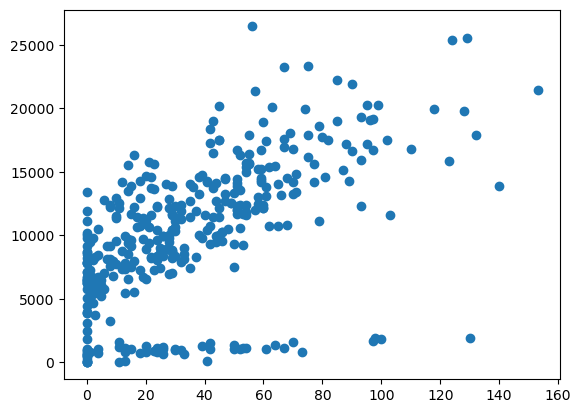

In [131]:
import pylab as plt
#import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y = fitbit['Steps'] )


#### What can you say about Minute Very Active and Steps? Write a comment below

In [135]:
#Many are active very few minutes but have many steps. 
# Mant have very few steps despite beeing very active many minutes.

# Thus: Many outliers. For the others, the correlation is flagrant. 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [136]:
fitbit[['Minutes Sedentary','Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

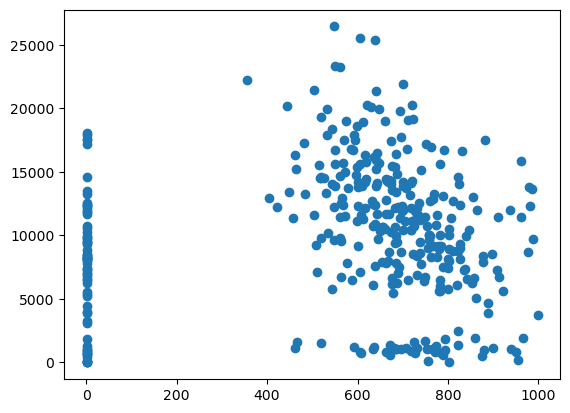

In [137]:
import pylab as plt
#import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Sedentary'], y = fitbit['Steps'] )


In [138]:
# Close to none correlation

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [139]:
fitbit[['MinutesOfSleep','Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

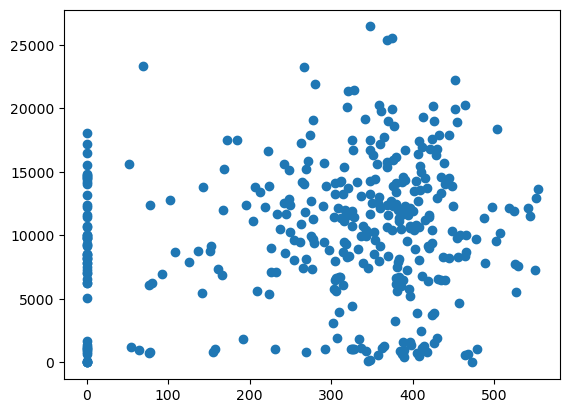

In [171]:
import pylab as plt
#import matplotlib.pyplot as plt

plt.scatter(x=fitbit['MinutesOfSleep'], y = fitbit['Steps'] );

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [142]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

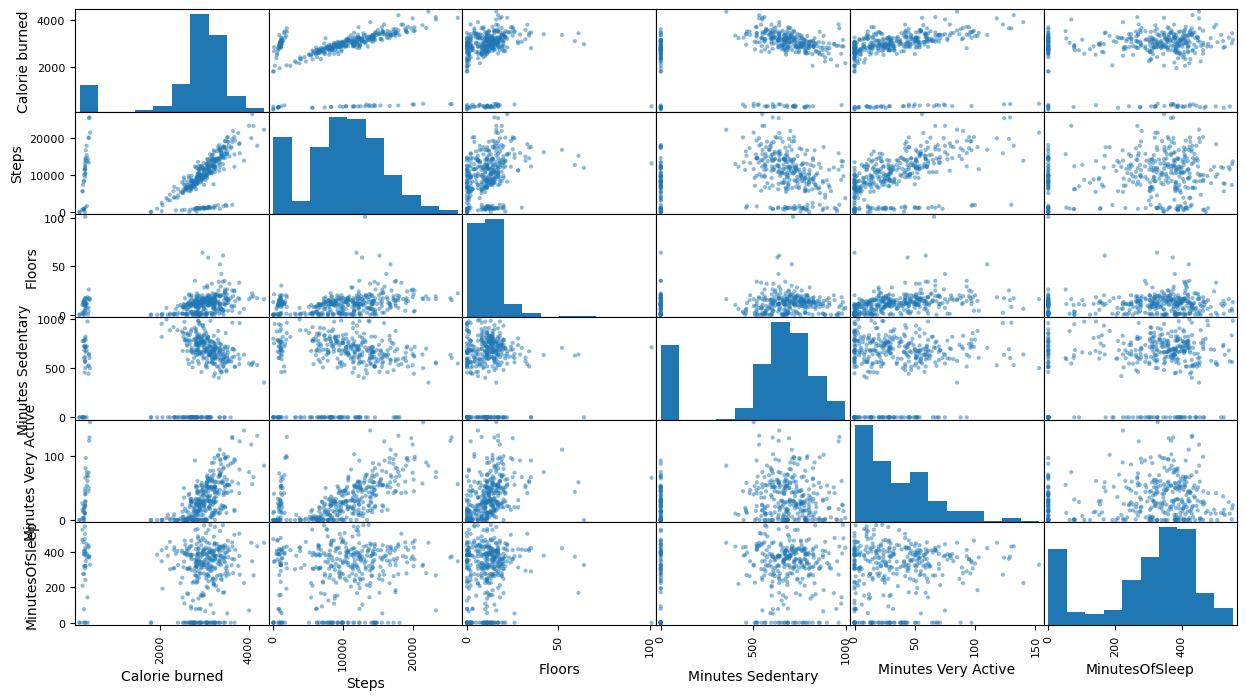

In [147]:
pd.plotting.scatter_matrix(fitbit[column]._get_numeric_data(), figsize=(15, 8));

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [148]:
#Calorie Burned, Floors and Minutes very active

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [150]:
time_grades = pd.read_csv('Time_Grades.csv')

In [154]:
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

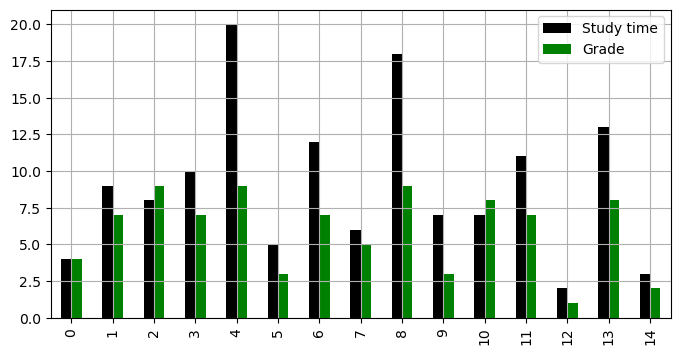

In [159]:
time_grades.plot(kind='bar',
                    figsize=(8, 4),
                    color=['black','g'],  
                    grid=True)

plt.show();


#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [166]:
import scipy.stats as st

In [170]:
st.pearsonr(time_grades['Study time'], time_grades['Grade']), st.spearmanr(time_grades['Study time'], time_grades['Grade']), 

(PearsonRResult(statistic=0.7980456073578859, pvalue=0.0003627635256342718),
 SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485))

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

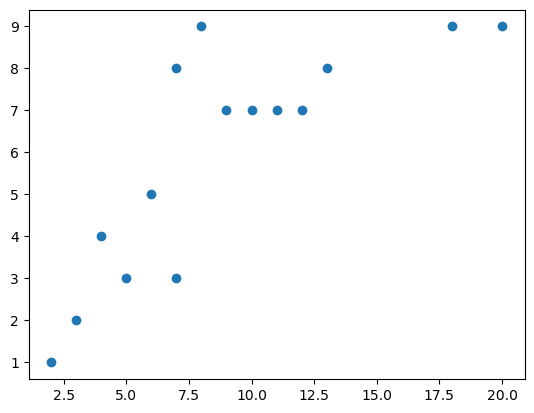

In [172]:
plt.scatter(x=time_grades['Study time'], y = time_grades['Grade'] );

In [173]:
#They are correlated

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [33]:
'''The fundamental difference between the two correlation coefficients is that 
the Pearson coefficient works with a linear relationship between the two variables 
whereas the Spearman Coefficient works with monotonic relationships as well.

El coeficiente de correlación de Spearman se basa en los valores jerarquizados de cada variable y no en los datos sin procesar. 
La correlación de Spearman suele utilizarse para evaluar relaciones en las que intervienen variables ordinales. 
'''